In [51]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [52]:
# 1. Cargue los datos y revise los formatos de cada variable, recuerde 
# codificar las variables como numéricas o factores según corresponda.

# Cargar datos
rrhh = pd.read_csv('rrhh.csv')
rrhh.head()


,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,Desempeño
0,0,30.0,28.50,4167.066667,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34.0,23.00,6962.466667,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31.0,29.00,4330.333333,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32.0,21.50,4332.733333,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30.0,16.56,3388.333333,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review


In [53]:
rrhh.shape

(310, 11)

In [54]:
rrhh.dtypes

Estado               int64
Edad               float64
Ratio.Pago         float64
Salario            float64
Dias.trabajados      int64
Ausencias            int64
Sexo                object
Estado.Civil         int64
Departamento        object
Posicion            object
Desempeño           object
dtype: object

In [55]:
rrhh = pd.get_dummies(rrhh, drop_first=True)
rrhh.head()

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil,Sexo_Male,Departamento_Executive Office,Departamento_IT/IS,...,Posicion_Software Engineering Manager,Posicion_Sr. Accountant,Posicion_Sr. DBA,Posicion_Sr. Network Engineer,Desempeño_Exceeds,Desempeño_Exceptional,Desempeño_Fully Meets,Desempeño_N/A- too early to review,Desempeño_Needs Improvement,Desempeño_PIP
0,0,30.0,28.50,4167.066667,3317,1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,34.0,23.00,6962.466667,1420,17,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,31.0,29.00,4330.333333,1154,3,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,32.0,21.50,4332.733333,58,15,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,30.0,16.56,3388.333333,940,2,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# 2. Realice un análisis descriptivo de sus datos. Determinar si existen observaciones faltantes, 
# en el caso de existir tome la decisión de omitirlas del estudio u omitir la variable. 
# Evalúe si existen posibles incongruencias en la fuente de datos (ej: edades negativas). 
# Y finalmente análice la presencia de valores atípicos en las variables. Comente.

# Revisar si existen valores negativos
rrhh.describe()


,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil,Sexo_Male,Departamento_Executive Office,Departamento_IT/IS,...,Posicion_Software Engineering Manager,Posicion_Sr. Accountant,Posicion_Sr. DBA,Posicion_Sr. Network Engineer,Desempeño_Exceeds,Desempeño_Exceptional,Desempeño_Fully Meets,Desempeño_N/A- too early to review,Desempeño_Needs Improvement,Desempeño_PIP
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,38.867742,31.284806,4606.534839,1296.080645,10.264516,2.903226,0.429032,0.003226,0.161290,...,0.003226,0.006452,0.012903,0.016129,0.090323,0.029032,0.583871,0.119355,0.048387,0.029032
std,0.492569,8.922459,15.383615,1677.350176,769.491382,5.843235,1.150625,0.495738,0.056796,0.368393,...,0.056796,0.080192,0.113040,0.126175,0.287107,0.168168,0.493712,0.324730,0.214930,0.168168
min,0.000000,25.000000,14.000000,3004.600000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,20.000000,3707.033333,766.250000,5.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,24.000000,4190.666667,1238.000000,10.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,45.315000,4804.733333,1732.750000,15.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,67.000000,80.000000,16666.666667,4339.000000,20.000000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Revisar si existen valores nulos
rrhh.isnull().sum()

Estado                                   0
Edad                                     0
Ratio.Pago                               0
Salario                                  0
Dias.trabajados                          0
Ausencias                                0
Estado.Civil                             0
Sexo_Male                                0
Departamento_Executive Office            0
Departamento_IT/IS                       0
Departamento_Production                  0
Departamento_Sales                       0
Departamento_Software Engineering        0
Posicion_Administrative Assistant        0
Posicion_Area Sales Manager              0
Posicion_BI Developer                    0
Posicion_BI Director                     0
Posicion_CIO                             0
Posicion_Data Architect                  0
Posicion_Database Administrator          0
Posicion_Director of Operations          0
Posicion_Director of Sales               0
Posicion_IT Director                     0
Posicion_IT

In [58]:
rrhh.dtypes


Estado                                     int64
Edad                                     float64
Ratio.Pago                               float64
Salario                                  float64
Dias.trabajados                            int64
Ausencias                                  int64
Estado.Civil                               int64
Sexo_Male                                  uint8
Departamento_Executive Office              uint8
Departamento_IT/IS                         uint8
Departamento_Production                    uint8
Departamento_Sales                         uint8
Departamento_Software Engineering          uint8
Posicion_Administrative Assistant          uint8
Posicion_Area Sales Manager                uint8
Posicion_BI Developer                      uint8
Posicion_BI Director                       uint8
Posicion_CIO                               uint8
Posicion_Data Architect                    uint8
Posicion_Database Administrator            uint8
Posicion_Director of

In [59]:
# Separar variables independientes y dependiente
X = rrhh.drop('Estado', axis=1)
y = rrhh_cont['Estado']

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Crear modelo de regresión logística
model = LogisticRegression()

# Entrenar modelo
model.fit(X_train, y_train)

c:\Users\Polette\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# Predecir con datos de prueba
y_pred = model.predict(X_test)

# Evaluar modelo con accuracy
accuracy_score(y_test, y_pred)
print('Accuracy de regresión logística: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy de regresión logística: 0.75


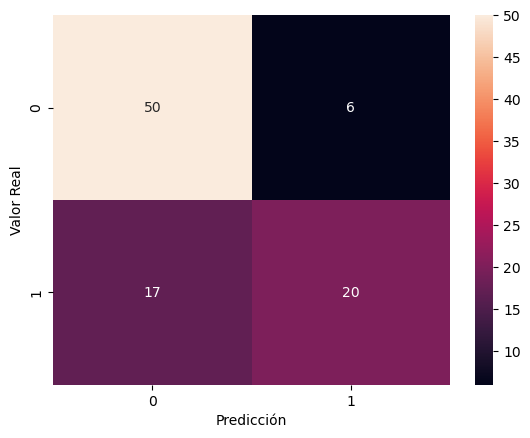

In [61]:
# realizar matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

# agregar leyenda
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

